<h1>Image Encryption and Decryption using RSA Algorithm
    <br>Khushi Jain
    <br>20BCE2664
    <br> CODE SNIPPETS</h1>

In [1]:
#Importing Libraries
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

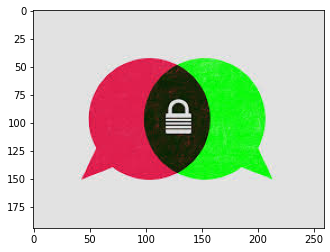

In [2]:
#Reading Images
images = [cv2.imread(img) for img in glob.glob("Images/*.jpg")]
for img in images:
    imgArray = np.array(img)
    plt.imshow(imgArray)
    plt.show()

<h2>RSA Algorithm</h2>

<h3>I. Generate Two Large Prime Numbers (p, q) randomly</h3>

In [3]:
from random import randrange, getrandbits

def Power(a, d, n):
    res = 1;
    while d != 0:
        if d%2 == 1:
            res = ((res%n) * (a%n))%n
        a = ((a%n) * (a%n))%n
        d >>= 1
    return res;

def mllRabin(N, d):
    a = randrange(2, N - 1)
    x = Power(a, d, N);
    if x == 1 or x == N - 1:
        return True;
    
    else:
        while(d != N - 1):
            x = ((x%N)*(x%N))%N;
            if x == 1:
                return False;
            
            if x == N - 1:
                return True;
            
            d <<= 1;
    return False;
    
def isPrime(N, K):
    if N == 3 or N == 2:
        return True;
    
    if N <= 1 or N%2 == 0:
        return False;
    
    #d should be such that d * (2 ^ r) = x - 1
    d = N - 1
    while d%2 != 0:
        d /= 2;
        
    for _ in range(K):
        if not mllRabin(N, d):
            return False;
    return True;

def genPrimeCand(len):
    #Generate Random Bits
    p = getrandbits(len)
    
    #Apply a mask to set MSB and LSB to 1
    #Set MSB = 1 to make sure we have a number of 1024 bits.
    #Set LSB = 1 to make sure we get an Odd Number.
    p |= (1 << len - 1) | 1
    return p

def genPrimeNum(len):
    A = 24
    while not isPrime(A, 128):
        A = genPrimeCand(len)
    return A

len = 5
# P = genPrimeNum(len)
# Q = genPrimeNum(len)
P = 19
Q = 17

print(P)
print(Q)

19
17


<h3>II. Generate Two Large Prime Numbers (p, q) randomly</h3>

In [4]:
N = P * Q
eulerTotient = (P - 1) * (Q - 1)
print(N)
print(eulerTotient)

323
288


<h3>
III. Find E such that GCD(E, eulerTotient) = 1 (e -> should be co-prime)
such that it satifies Condition 1
</h3>

In [5]:
from math import gcd

def findPubExp(eulerTotient):
    for E in range(2, eulerTotient):
        if gcd(E, eulerTotient) == 1:
            return E
    return None

E = findPubExp(eulerTotient)
print(E)

5


<h3>IV. Find D</h3>

For Finding D: It must satisy this property -> (D * E)Mod(eulerTotient) = 1;
#There are two choices:
1. Choose D randomly and check which condition is satisfying above condition
2. Finding D we can use Extended Euclidean Algorithm:
   ax + by = 1 i.e eulerTotient (x) + E(y) = GCD(eulerTotient, e)
Best Approach -> 2 Extended Euclidean Algorithm

In [6]:
def GCDExtended(E, eulerTotient):
    a1, a2, b1, b2, d1, d2 = 1, 0, 0, 1, eulerTotient, E
    
    while d2 != 1:
        #k
        k = (d1//d2)
        
        #a
        tmp = a2
        a2 = a1 - (a2 * k)
        a1 = tmp
        
        #b
        tmp = b2
        b2 = b1 - (b2 * k)
        b1 = tmp
        
        #d 
        tmp = d2
        d2 = d1 - (d2 * k)
        d1 = tmp
        
    D = b2
        
    if D > eulerTotient:
        D = D%eulerTotient
    elif D < 0:
        D = D + eulerTotient
        
    return D

D = GCDExtended(E, eulerTotient)
print(D)

173


In [7]:
for img in images:
    r, c = img.shape[0], img.shape[1]
    enc = [
        [
            0 for x in range(3000)
        ]
        
        for y in range(3000)
    ]

<h3>V. Encryption</h3>

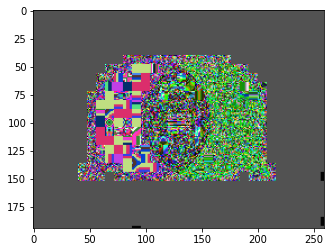

In [8]:
for img in images:
    enc = np.zeros_like(img)
    h, w, _ = img.shape
    
    for i in range(h):
        for j in range(w):
            r, g, b = img[i, j]
            C1 = Power(r, E, N)
            C2 = Power(g, E, N)
            C3 = Power(b, E, N)
            
            enc[i][j] = [C1, C2, C3]
            
            C1 = C1 % 256
            C2 = C2 % 256
            C3 = C3 % 256
            
            img[i, j] = [C1, C2, C3]
            
    plt.imshow(img)
    plt.show()

<h3>VI. Decryption</h3>

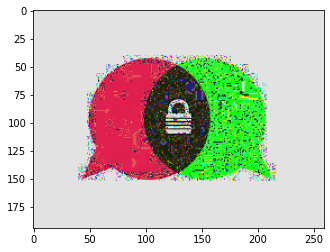

In [9]:
for img in images:
    h, w, _ = enc.shape
    
    for i in range(h):
        for j in range(w):
            r, g, b = enc[i][j]
            D1 = Power(r, D, N)
            D2 = Power(g, D, N)
            D3 = Power(b, D, N)
            
            img[i, j] = [D1, D2, D3]
            
    plt.imshow(img)
    plt.show()